In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/12367/Desktop/Tableau 652 Assignment 1/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Select the independent variables (features) and the target variable (price)
X = df.drop("price", axis=1)
y = df["price"]

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=["object"]).apply(label_encoder.fit_transform)

# Perform one-hot encoding on the categorical variables
onehot_encoder = OneHotEncoder(sparse=False)
X_encoded = onehot_encoder.fit_transform(X_categorical)

# Concatenate the encoded categorical variables with the numerical variables
X_numerical = X.select_dtypes(exclude=["object"])
X_processed = pd.concat([pd.DataFrame(X_encoded), X_numerical], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create a neural network model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(X_processed.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)



c:\Users\12367\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 25232718954496.0000
Epoch 2/10
14/14 [==============================] - 0s 1ms/step - loss: 25227763384320.0000
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 25222621167616.0000
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 25217250361344.0000
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 25212554838016.0000
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 25207414718464.0000
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 25200999530496.0000
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 25193628041216.0000
Epoch 9/10
14/14 [==============================] - 0s 1ms/step - loss: 25184652230656.0000
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 30057540091904.0000


In [4]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 30057540091904.0000


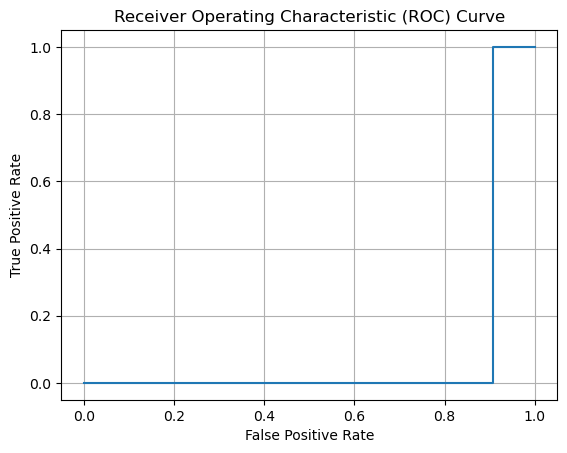

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

# Convert the target variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Select the class index you want to consider as the positive class
pos_class_index = 0  # Example: considering the first class as positive

# Get the predicted probabilities for the positive class
y_pred_proba_positive = y_pred_proba[:, pos_class_index]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba_positive, pos_label=pos_class_index)

# Create the ROC curve plot
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()


In [7]:
# Convert the target variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict probabilities for the positive class
y_pred_proba = model.predict(X_test)
y_pred_proba_positive = y_pred_proba.flatten()

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba_positive)

# Create the ROC curve plot
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

4/4 [==============================] - 0s 2ms/step


ValueError: multiclass format is not supported

In [6]:
from sklearn.metrics import roc_curve, RocCurveDisplay
# Convert the target variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

# Create the ROC curve plot
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


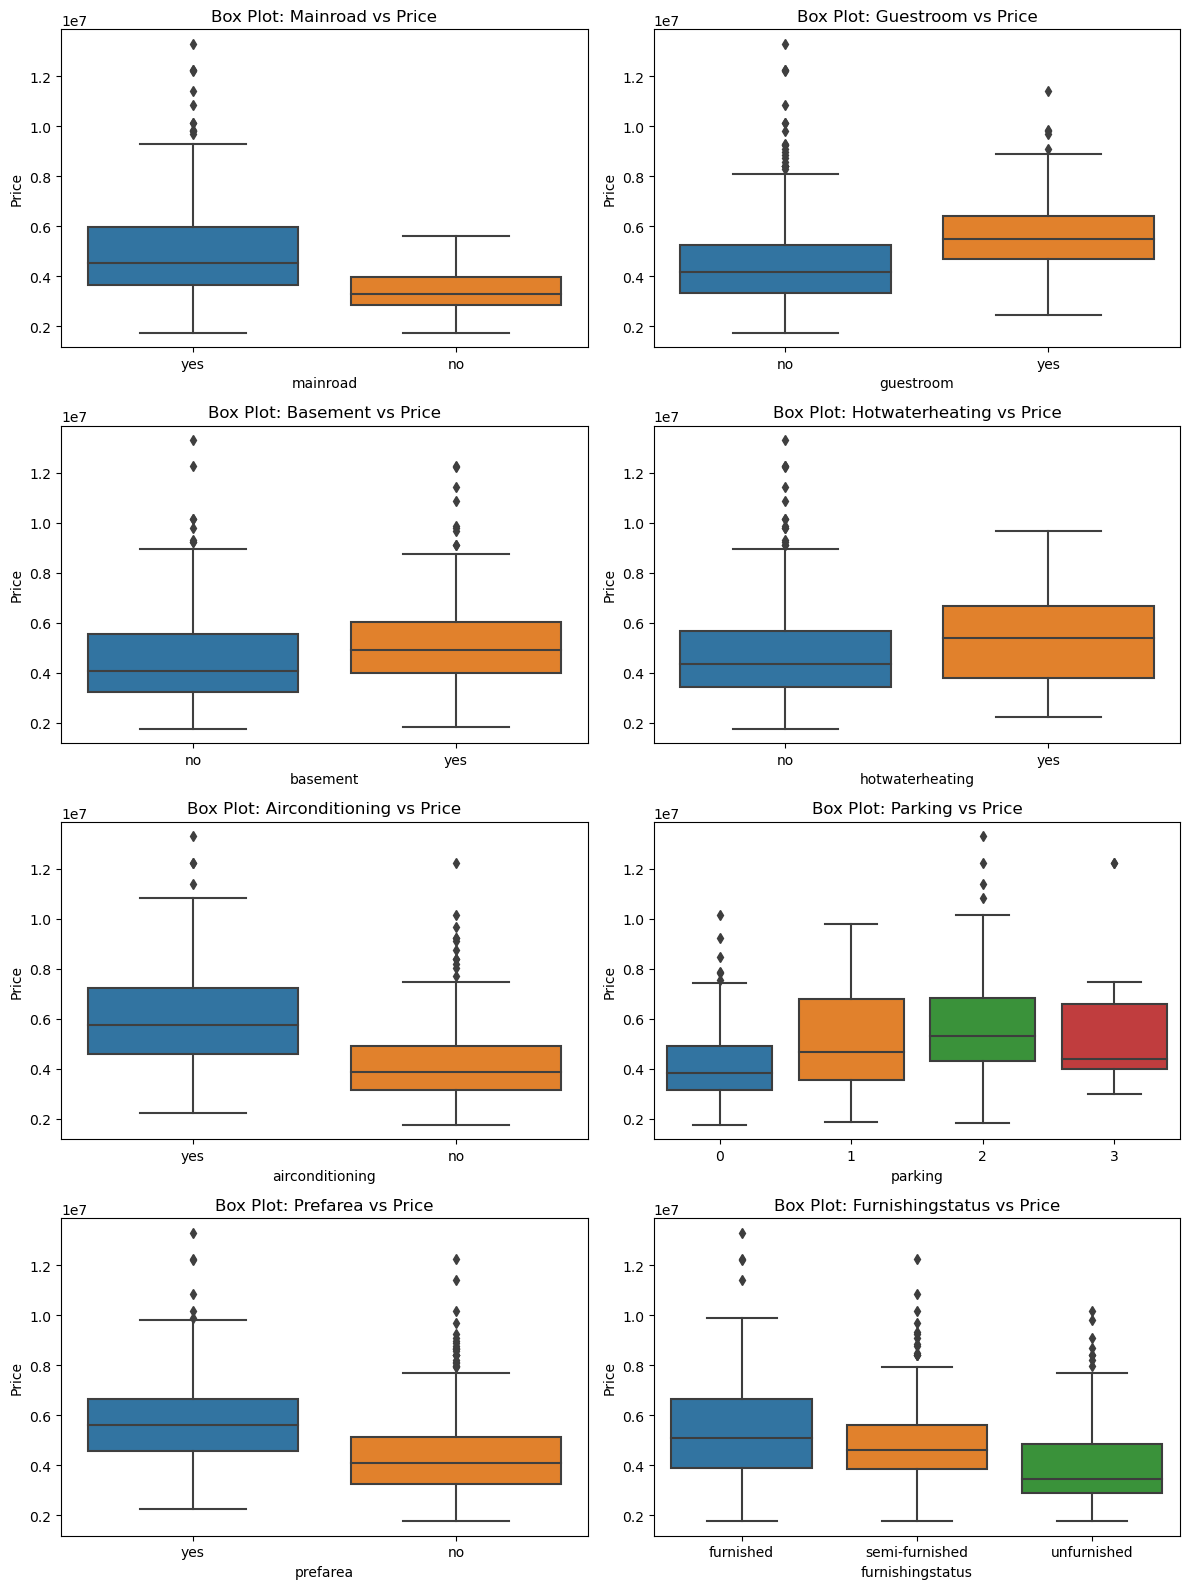

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Independent variables
independent_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Iterate over each independent variable and create a scatter plot
for i, var in enumerate(independent_vars):
    row = i // 2
    col = i % 2

    sns.boxplot(x=var, y='price', data=df, ax=axs[row, col])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title(f'Box Plot: {var.capitalize()} vs Price')

plt.tight_layout()
plt.show()


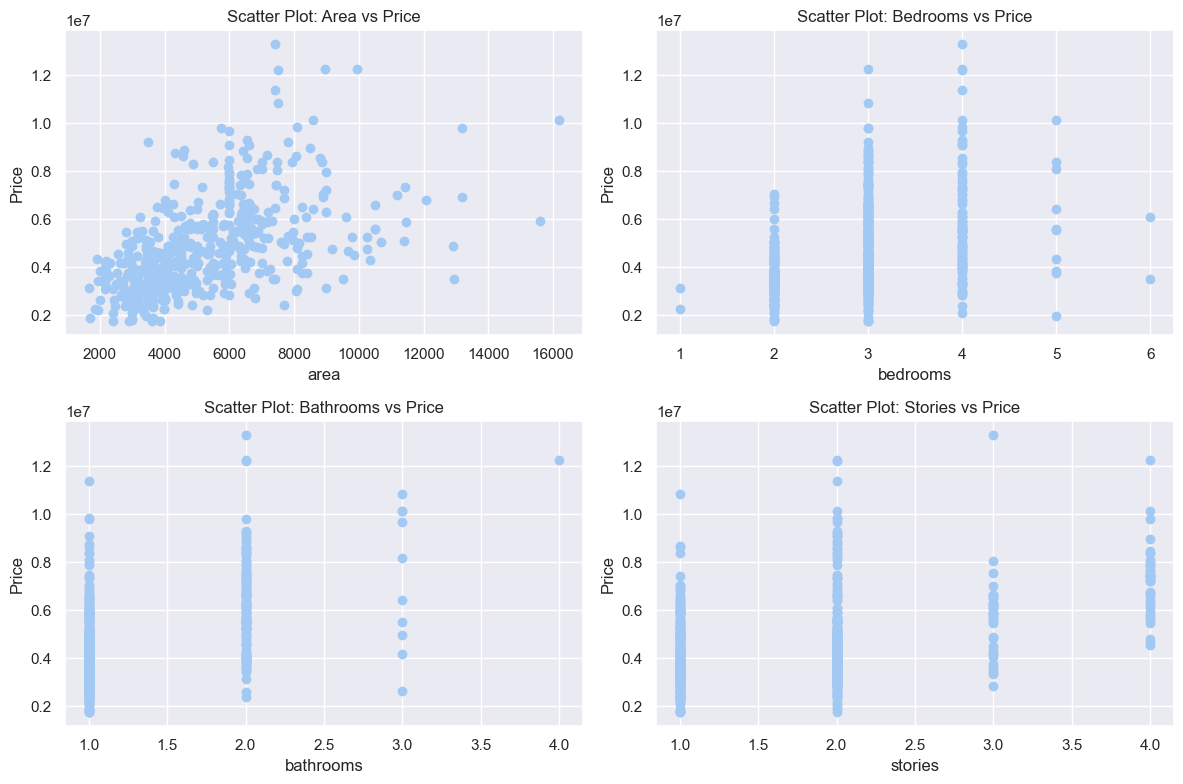

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Independent variables
independent_vars = ['area', 'bedrooms', 'bathrooms', 'stories']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each independent variable and create a scatter plot
for i, var in enumerate(independent_vars):
    row = i // 2
    col = i % 2

    axs[row, col].scatter(df[var], df['price'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title(f'Scatter Plot: {var.capitalize()} vs Price')

plt.tight_layout()
plt.show()


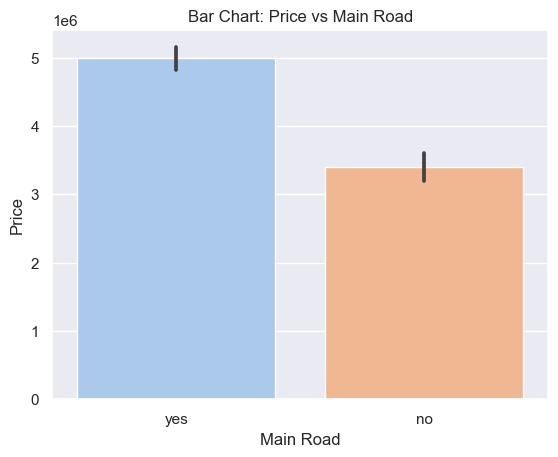

In [16]:
import seaborn as sns

sns.barplot(x='mainroad', y='price', data=df)
plt.xlabel('Main Road')
plt.ylabel('Price')
plt.title('Bar Chart: Price vs Main Road')
plt.show()


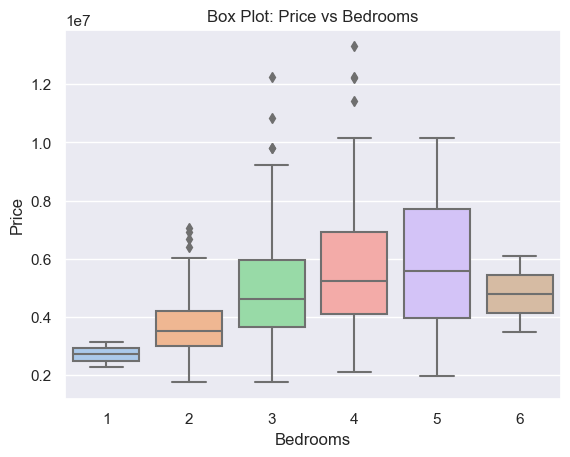

In [15]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot: Price vs Bedrooms')
plt.show()


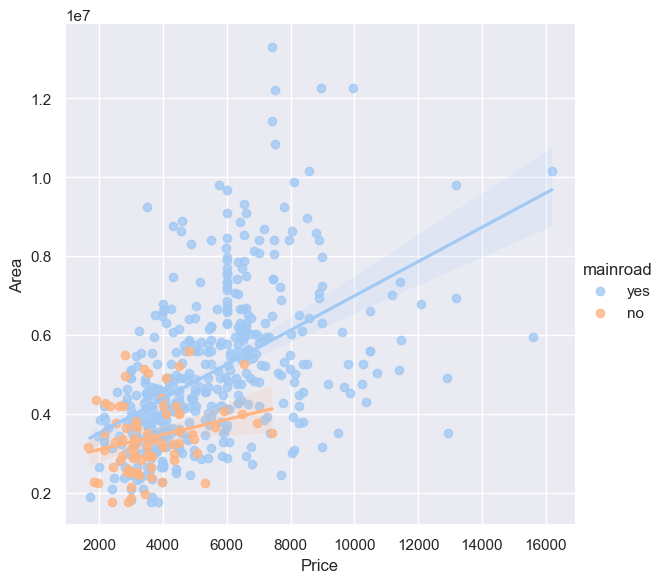

In [9]:
sns.set_theme(style='darkgrid', palette='pastel')

a = sns.lmplot(data=df, x='area', y='price', hue='mainroad', height=6)

a.set_axis_labels('Price', 'Area')

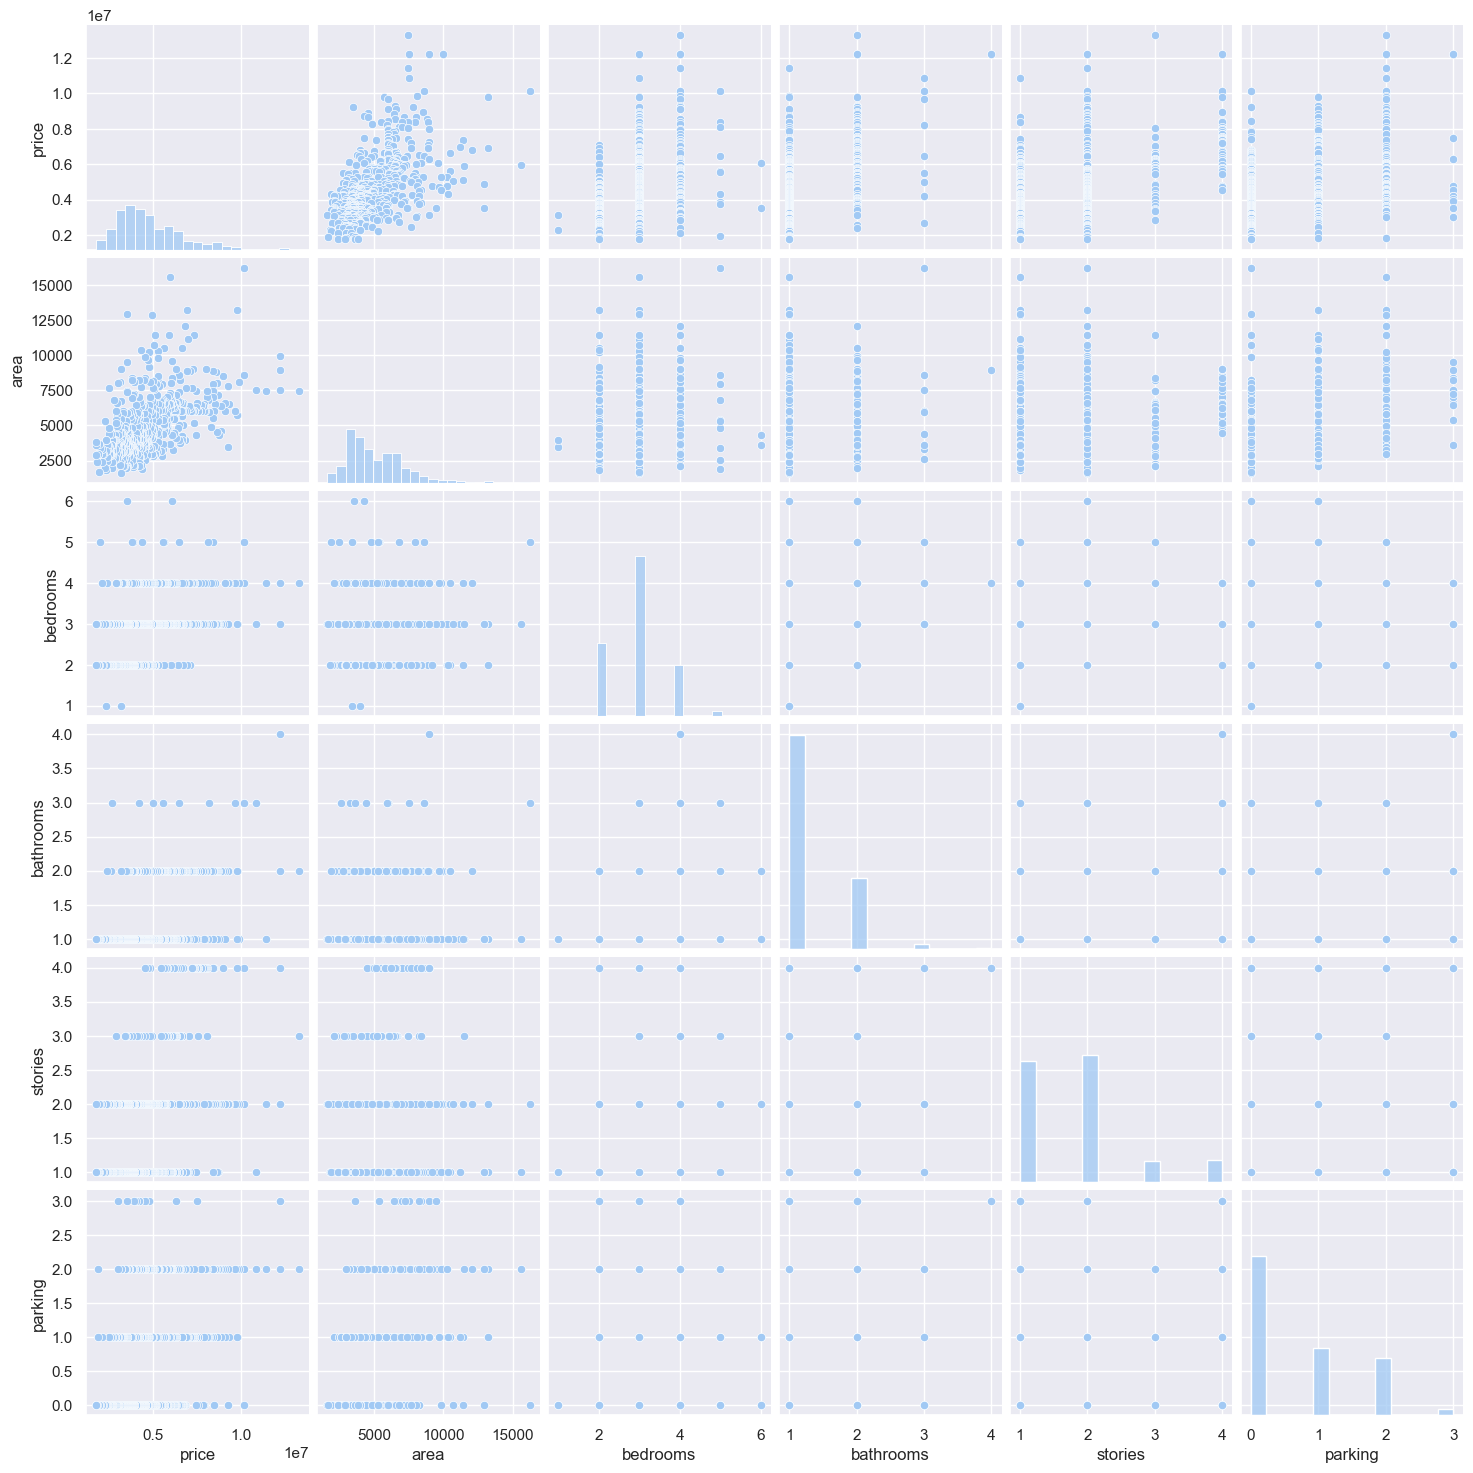

In [10]:
sns.pairplot(df)